In [4]:
import numpy as np
from matplotlib import pyplot as plt

In [124]:
def UCB1(k, steps, runs, true_values, c):
    avg = np.zeros([steps])
    opt = np.zeros([steps])
    
    opt_arms = np.argmax(true_values,axis = 1)
    print(c)
    for i in range(runs):   
        '''
        Expected rewards of each arm. Each arm has a value and the number of times it has been pulled.
        ''' 
        Q = np.zeros([k])
        N = np.ones([k])
        
        '''
        Pull each arm once
        '''
        Q_1 = np.random.normal(true_values[i],1)
        
        avg[0] += np.mean(Q_1)  
        
        for j in range(2, steps+1):
            '''
            Selecting the arm which has highest upper confidence bound
            '''
            upper_bounds = Q + np.sqrt(c*np.log(j)/N)

            max_arm = np.argmax(upper_bounds)
            reward = np.random.normal(true_values[i][max_arm],1)
            
            N[max_arm] += 1
            Q[max_arm] = Q[max_arm] + (reward - Q[max_arm])/N[max_arm]         

            if opt_arms[i] == max_arm:
                opt[j-2]+=1

        
            avg[j-1] += reward
            

    avg = np.divide(avg, runs)
    opt = np.divide(opt, runs/100)
        
    return avg, opt
    
    

In [125]:
def plot_all(avg_reward, opt_percent, C):



#     fig1=plt.figure()
#     fig2=plt.figure()

#     fig1 = fig1.add_axes([0.1, 0.1, 0.6, 0.75])
#     fig2 = fig2.add_axes([0.1, 0.1, 0.6, 0.75])
    fig1=plt.figure(figsize=(10,6)).add_subplot(111)
    fig2=plt.figure(figsize=(10,6)).add_subplot(111)

#     x = np.zeros([len(avg_reward[0])])
#     for i in range(1,steps+1):
#         x[i-1] = i

    colors = ['r', 'g', 'k', 'b', 'y','m', 'c']
    for i in range(len(avg_reward)):
        fig1.plot(range(steps), avg_reward[i], colors[i], label = "c = " + str(C[i]) )

    for i in range(len(opt_percent)):
        fig2.plot(range(steps), opt_percent[i], colors[i], label = "c = " + str(C[i]) )

    fig1.title.set_text('UCB1 : Average Reward Vs Steps for 10 arms')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('Steps')
    fig1.set_ylim(-0.5,1.6)
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    fig2.title.set_text('UCB1 : $\%$ Optimal Action Vs Steps for 10 arms')
    fig2.set_ylabel(r'$\%$ Optimal Action')
    fig2.set_xlabel('Steps')
    fig2.set_ylim(0,100)
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    fig1 = fig1.get_figure()
    fig2 = fig2.get_figure()

    # fig1.savefig('fig1.jpg')
    # fig2.savefig('fig2.jpg')
    plt.show()


0.1
2
5


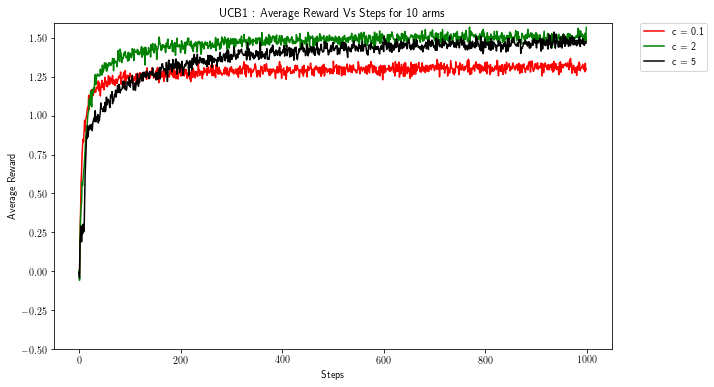

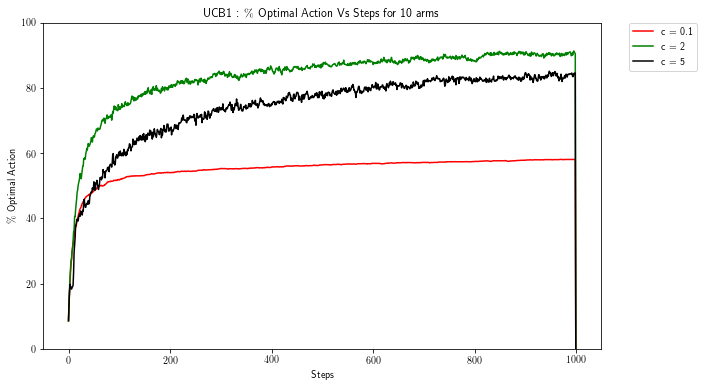

In [128]:
import math
from termcolor import colored

if __name__ == '__main__':
    steps = 1000
    runs = 2000
    k = 10
    mean = 0
    std_dev = 1
    C = [0.1, 2, 5]

    true_values = np.random.normal(mean, std_dev, (runs, k))
    
    avg_reward = []
    opt_arm = []
    
    for i in range(len(C)):
        avg, opt = UCB1(k, steps, runs, true_values, C[i])
        avg_reward.append(avg)
        opt_arm.append(opt)
    
    plot_all(avg_reward, opt_arm, C)

    

In [ ]:
def plot_fig(avg, opt):
    
    fig1=plt.figure()
    fig2=plt.figure()

    fig1 = fig1.add_axes([0.1, 0.1, 0.6, 0.75])
    fig2 = fig2.add_axes([0.1, 0.1, 0.6, 0.75])

    x = np.zeros([len(avg)])
    for i in range(1,steps+1):
        x[i-1] = i

    fig1.plot(x, avg, 'r')

    fig2.plot(x, opt, 'b')

    fig1.title.set_text('UCB1 : Average Reward Vs Steps for 10 arms')
    fig1.set_ylabel('Average Reward')
    fig1.set_xlabel('Steps')
    fig1.set_ylim(-0.5,1.6)
    fig1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    fig2.title.set_text('UCB1 : $\%$ Optimal Action Vs Steps for 10 arms')
    fig2.set_ylabel(r'$\%$ Optimal Action')
    fig2.set_xlabel('Steps')
    fig2.set_ylim(0,100)
    fig2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    fig1 = fig1.get_figure()
    fig2 = fig2.get_figure()

    # fig1.savefig('fig1.jpg')
    # fig2.savefig('fig2.jpg')
    plt.show()